# 线性回归

> Refs:
>
> [machine-learning-notes](http://nbviewer.jupyter.org/github/hschen0712/machine-learning-notes/tree/master/PRML/)
>
> [notes-machine-learning](http://nbviewer.jupyter.org/github/lijin-THU/notes-machine-learning/tree/master/Pattern-Recognition-and-Machine-Learning/)

## 创建一个数据集 $\mathcal{D}$
本节中我们需要对一个多项式进行拟合, 我们选择 $y = sin(2 \pi x) + \epsilon$, 其中 $\epsilon$ 是一个由 $\mu = 0, \sigma = 0.3$ 的高斯分布生成的噪音. 数据集由 $[0, 1]$ 上等距产生的 10 个点 $\boldsymbol{x} = \{x_1, \cdots, x_10\}$ 所计算出的 $\boldsymbol{y}$. 

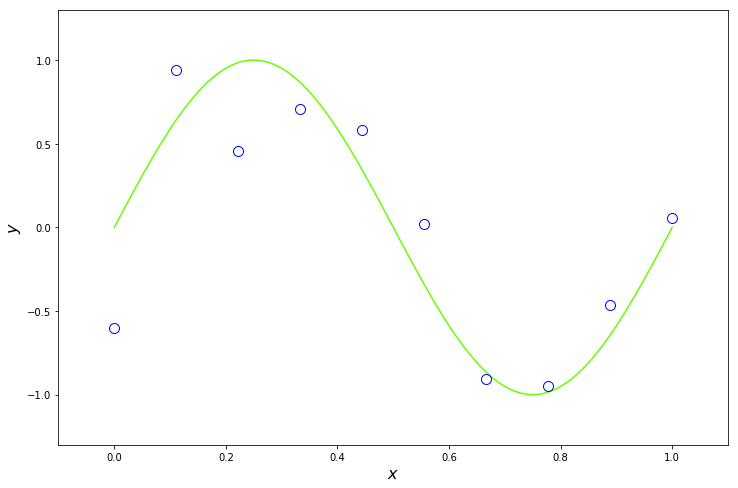

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 构造目标曲线和训练数据集
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)
x_tr = np.linspace(0, 1, 10)
y_tr = np.sin(2 * np.pi * x_tr) + np.random.normal(0, 0.3, 10)
# 画图
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='#66FF00')
plt.plot(x_tr, y_tr, 'o', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.3, 1.3)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

## 线性模型
用多项式曲线来拟合目标函数:

$$\hat{y}(x, \boldsymbol{w}) = \sum_{j=0}^M w_j x^j$$

> `M` 为多项式的阶, 也就是模型的复杂度(容量)

该模型为线性模型, 误差函数(error function) 可以用测试集上的 **均方误差(mean squared error)**: $\text{MSE}_{\text{test}} = \frac{1}{m} \sum_i(\hat{\boldsymbol{y}}^{(\text{test}))} - \boldsymbol{y}^{(\text{test})})_i^2 = \frac{1}{m} \lVert \hat{\boldsymbol{y}}^{(\text{test})} - \boldsymbol{y}^{(\text{test})}\rVert_2^2$ (越小越好, 也就是平方欧几里德距离除以 $m$ ).

> MSE 就是作为线性回归的目标函数

最小化 $\text{MSE}_\text{train}$, 通过求其梯度为 0 :

$$
\nabla_w \text{MSE}_\text{train} = 0 \\
\Rightarrow \frac{1}{m} \nabla_w \lVert \boldsymbol{X} \boldsymbol{w} -  \boldsymbol{y} \rVert_2^2  = 0\\
\Rightarrow \boldsymbol{w} = (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{y}
$$

### squared error 的含义

首先所有点按照前面的数据集构造法, 为 $p(y | x; \boldsymbol{w}, \beta) = 
\mathcal{N}(y; \hat{y}(x; \boldsymbol{w}), \beta^{-1})$

> 概率函数参数表中的 `;` 而不是像某些书(e.g. PRML) 中的 `|` 是为了区分似然参数和条件概率(而似然函数中的 `|` 一般就不需要改成 `;` 以示区别了).
>
> 上面的是 **条件似然函数**, 是因为, 可能会有多个不同的 $x$ 对应同一个 $y$ (PRML 里面没有这样理解,
> 不过最终的结果是一样的

所以其联合对数似然就是:

$$\sum \ln p(y | x; \boldsymbol{w}, \beta) = -\frac{\beta}{2} \sum_{n=1}^{N}(y(x_n, \boldsymbol{w} - y_n)^2 + \frac{N}{2} \ln \beta - \frac{N}{2} \ln (2 \pi)$$

对于 $\boldsymbol{w}$, 为了令其联合对数似然最大, 也就是最小化 $\frac{1}{2} \lVert \boldsymbol{y}(\boldsymbol{x}, \boldsymbol{w}) - \boldsymbol{y} \rVert_2^2$ (也就是 square error, 这里是把 $\beta$ 当做常数, MSE 只是比这个多了个系数, 不影响后面求导得出 least squares)

模型的容量导致的过拟合和欠拟合(当 M = 0 和 1 的时候为欠拟合, 当 M = 9 的时候为过拟合):

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


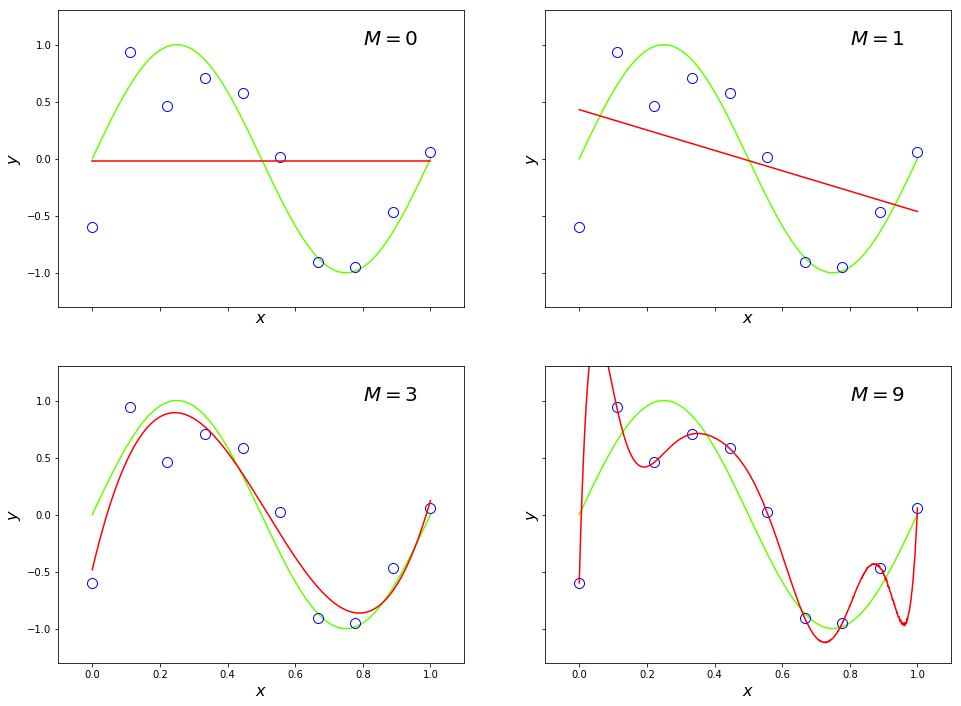

In [5]:
def predict(w, x):
    '''make predictions for x
    # Arguments:
        w: coefficients of the polynomial model
        x: vector of input variables
    # Returns:
        predicted target variables
    '''
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    return X.dot(w) # 点乘


# 模型的不同容量
M_vals = [0, 1, 3, 9]
# 2x2 的子图
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))
# axes 是形如 [[x_1, y_1], [x_2, y_2]] 的列表(x_1 表示图一的 x 轴), 需要扁平化为 [x_1, y_1, x_2, y_2] 的列表
axes = np.ravel(axes)
for M, ax in zip(M_vals, axes):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.plot(x, predict(w, x), 'r-')
    ax.text(0.8, 1, '$M={}$'.format(M), size=20)

用 `MSE` 来评估模型的泛化能力:

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


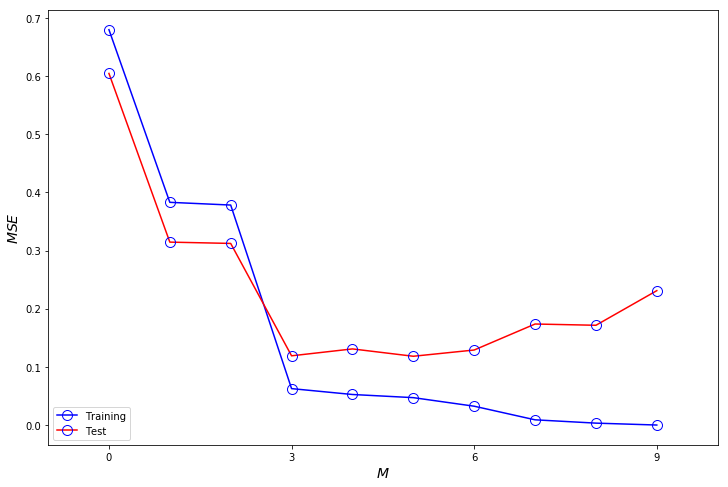

In [12]:
# 100 个 test 点
n_te = 100
x_te = np.linspace(0, 1, n_te)
y_te = np.sin(2 * np.pi * x_te) + np.random.normal(0, 0.3, n_te)
# train 和 test 的 MSE
mse_tr = []
mse_te = []
for M in range(10):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    mse_tr.append(np.sum((predict(w, x_tr) - y_tr) ** 2 / len(y_tr)))
    mse_te.append(np.sum((predict(w, x_te) - y_te) ** 2 / len(y_te)))
# 画图
plt.figure(figsize=(12, 8))
plt.plot(np.arange(10), mse_tr, 'bo-', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1, label='Training')
plt.plot(np.arange(10), mse_te, 'ro-', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1, label='Test')
plt.xlim(-1, 10)
plt.xlabel('$M$', fontsize=14)
plt.ylabel('$\t{MSE}$', fontsize=14)
plt.legend(loc='lower left')
plt.xticks([0, 3, 6, 9])
plt.show()

## Regularization

为了减小模型的泛化误差, 除了增加数据集大小, 还可以通过在目标函数添加一个正则项 $\lambda \boldsymbol{w}^\top \boldsymbol{w}$ 来设定对模型容量的偏好($\lambda$ 越大表示偏好容量越小的模型), 这种技术被称为 **权重衰减**. 应用了上述正则项的回归被称为 **岭回归(ridge regression)**.

$$\arg \min_\boldsymbol{w} \frac{1}{m} \lVert \hat{\boldsymbol{y}} - \boldsymbol{y} \rVert_2^2 + \lambda \boldsymbol{w}^\top \boldsymbol{w}$$

> 对于 `Least square`, 有很多种方法来达到这个目的, 并且在设计矩阵不是满秩的时候, 这些方法会有区别.
> Ref: [stackexchange](https://stats.stackexchange.com/questions/266631/what-is-the-difference-between-least-square-and-pseudo-inverse-techniques-for-li), [linear_least_squares.pdf](http://www.cameronmusco.com/personal_site/pdfs/linear_least_squares.pdf)

### MAP(Maximum A Posterior)

和 MLE(Maxmium Likelihood Estimation) 一样, MAP 也是一种 Point estimation. 主要是很多时候, full Bayesian 的计算其 posterior 相当困难, MAP 提供有点贝叶斯味道的点估计.

例如对 $\theta$, 利用贝叶斯公式:

$$\theta_\text{MAP} = \arg \max_\theta p(\theta | \boldsymbol{x}) = \arg \max_\theta \log p(\boldsymbol{x} | \theta) + \log p(\theta)$$

> $\log p(\boldsymbol{x} | \theta)$ 对应着标准的对数似然项, $\log p(\theta)$ 就是先验分布.

对于本节例子的 $\boldsymbol{w}$, 假设我们有一个先验知识:

$$p(\boldsymbol{w} | \alpha) = \mathcal{N} (\boldsymbol{w}; \boldsymbol{0}, \alpha^{-1} \boldsymbol{I}) = \left( \frac{\alpha}{2 \pi} \right)^{(M+1)/2} \exp \left( - \frac{\alpha}{2} \boldsymbol{w}^\top \boldsymbol{w} \right)$$

> $\alpha$ 作为超参数控制这个先验分布.

又由贝叶斯公式:

$$p(\boldsymbol{w} | \boldsymbol{x}, \boldsymbol{y}, \alpha, \beta) \propto p(\boldsymbol{y} | \boldsymbol{x}, \boldsymbol{w}, \beta) p(\boldsymbol{w} | \alpha) $$

对上式最大化 MAP 可以得出等价于最小化:

$$\frac{\beta}{2} \lVert \hat{\boldsymbol{y}}(\boldsymbol{x}, \boldsymbol{w}) - \boldsymbol{y} \rVert_2^2 + \frac{\alpha}{2} \boldsymbol{w}^\top \boldsymbol{w}$$

> 正则项的 $\lambda = \frac{\alpha}{\beta}$

0.0
0.0009118819655545162
1.0


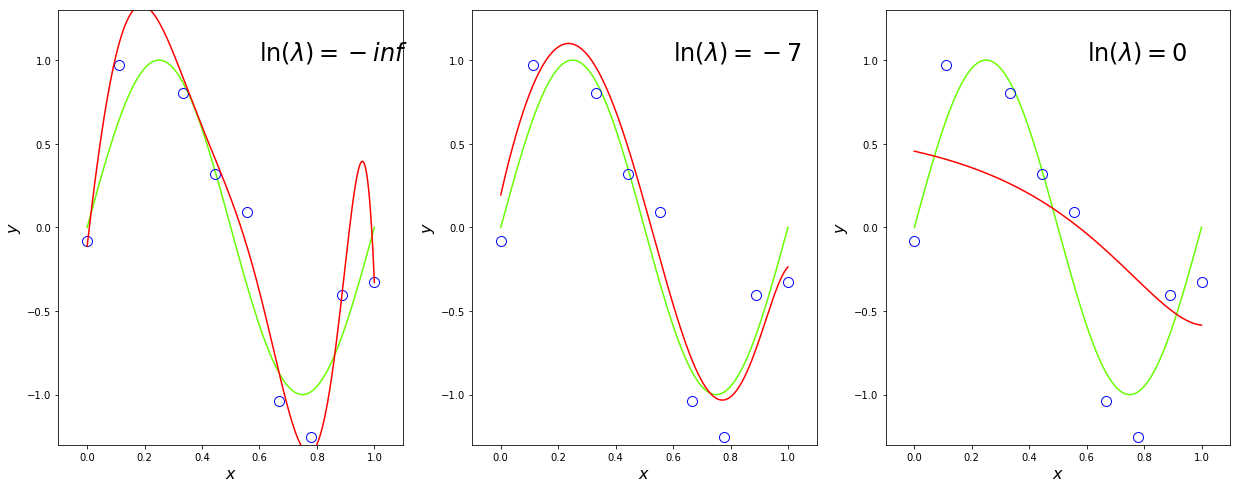

In [18]:
import functools # python3

# there are two(actually more) methods to **least square**(minimize the MSE), 
# Differences between methods can arise when the regressor matrix does not have full rank
def ridge_regression(x, y, lamb, M):
    '''ridge regression
    use derivative to calculate the result `w`
    Ref:
    https://blog.csdn.net/daunxx/article/details/51578787
    https://stats.stackexchange.com/questions/82880/
    applying-ridge-regression-for-an-underdetermined-system-of-equations
    
    let the derivation of target function equal to zero, $\bm{w} = (\bm{X}^\top \bm{X}
    + \aplha \bm{I})^{-1} \bm{X}^\top \bm{y}$
    # Arguments:
        x: vector of input variables
        y: targets of input variables
        lamb: regularization parameter
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    print(lamb)
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    X_2 = X.T.dot(X)
    # np.linalg.inv is the inverse of square
    w = functools.reduce(np.dot, [np.linalg.inv(X_2 + np.dot(lamb, np.identity(X_2.shape[0]))), X.T, y])
    return w


def ridge_regression_psuedoinverse(x, t, lamb, M):
    '''ridge regression
    需要补一下线性代数的东西, 加了一个 $\lambda \boldsymbol{I}$ 之后对 SVD 的影响不知道怎么推导出来的.
    Ref:
    http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf
    https://github.com/alexhuth/ridge
    # Arguments:
        x: vector of input variables
        t: targets of input variables
        lamb: regularization parameter
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    Phi = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    U, S, Vh = np.linalg.svd(Phi, full_matrices=False)
    Ut = U.T.dot(t)
    return functools.reduce(np.dot, [Vh.T, np.diag(S/(S**2 + lamb)), Ut])

    
# 9-阶函数回归
M = 9
fig, axes = plt.subplots(1, 3, figsize=(21, 8))
axes = np.ravel(axes)
for log_lamb, ax in zip([-np.inf, -7, 0], axes):
    w_ridge = ridge_regression(x_tr, y_tr, np.exp(log_lamb), M)
    # 画图
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)    
    ax.plot(x, predict(w_ridge, x), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.text(0.6, 1, '$\ln(\lambda)={}$'.format(log_lamb), size=24)

## Full Bayesian inference

频率派在对参数(e.g. $\theta$) 进行点估计时, 目标参数是视作一个 **固定但是未知的值**, 其点估计是一个 **随机变量**. 而贝叶斯派认为其参数就是一个 **unknown and uncertain 的随机变量**.

一般经验先验的选择都是一些比较宽泛(broad, **高墒** )的分布, 例如高斯分布或者无限面积上的均匀分布.

加入我们有一个数据集 $x^{(1)}, \cdots, x^{(n)}$, 通过贝叶斯规则, 我们可以恢复数据对我们关于 $\theta$ **信念(brief)** 的影响:

$$p(\theta | ^{(1)}, \cdots, x^{(n)}) = \frac{p(x^{(1)}, \cdots, x^{(n)}| \theta) p(\theta)}{p(^{(1)}, \cdots, x^{(n)})}$$

由全概率公式(用全概率公式和条件概率公式的 Venn 图理解), 可得

$$p(x^{(n+1)} | x^{(1)}, \cdots, x^{(n)}) = \int p(x^{(n+1)} | \theta) p(\theta | x^{(1)}, \cdots, x^{(n)}) d \theta $$

频率派通过计算方差来确定点估计的不确定性, 而贝叶斯派用 **积分** 来估计不确定性.

* 当训练数据有限时, 贝叶斯方法泛化的很好, 不过计算量大.
* 可以防止过拟合, 而最大似然估计往往会引起过拟合. 

### case study: 贝叶斯线性回归

对线性函数

$$\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}$$

> 如果是曲线你和, $\boldsymbol{x} = (x^0, x^1, \cdots, x^k)^\top$, 其中 k 为多项式阶数

给定 $m$ 个训练样本

$$\hat{\boldsymbol{y}}^{\text{train}} = \boldsymbol{X}^{\text{train}} \boldsymbol{w} \\
p(\boldsymbol{y}^{\text{train}} | \boldsymbol{X}^{\text{train}}, \boldsymbol{w}) = \mathcal{N}(\boldsymbol{y}^{\text{train}}; \boldsymbol{X}^{\text{train}} \boldsymbol{w}, \boldsymbol{\Lambda}) \\
\propto \exp \left( -\frac{1}{2}(\boldsymbol{y}^{\text{train}} - \boldsymbol{X}^{\text{train}}\boldsymbol{w})^\top (\boldsymbol{y}^{\text{train}} - \boldsymbol{X}^{\text{train}}\boldsymbol{w}) \right)
$$

> 后文中 $\boldsymbol{X}^{\text{train}} \boldsymbol{y}^{\text{train}}$ 简写为$X 和 y$, 省略黑体

> $\Lambda$ 一般直接用单位向量

先验

$$p(w) = \mathcal{N}(w; \mu_0, \Lambda_0^{-1})$$

> 一般来说, $\Sigma$ 不会用很复杂的协方差矩阵, 一般就是 $diag (\lambda_0)$, 大多数情况下设置 $\mu_0 = 0$

后验

$$p(w | X, y) \propto p(y | X, w) p(w) \\
\propto \exp \left( -\frac{1}{2} (y-Xw)^\top \Lambda (y - Xw) \right) \exp \left( -\frac{1}{2} (w - \mu_0)^\top \Lambda_0 (w - \mu_0) \right)\\
\propto \exp \left( -\frac{1}{2} (w - \mu_m)^\top \Lambda_m (w - \mu_m) \right)$$

上述过程就是通过配方法, 其中 $\Lambda_m = X^\top X + \Lambda_0, \mu_m = \Lambda_m^{-1}(X^\top \Lambda y + \Lambda_0 \mu_0)$

如果设置 $\mu_0 = 0, \Lambda_0 = \frac{1}{\alpha}I$, 那么 $\mu_m$ 对 $w$ 的估计跟频率派的岭回归是一样的, 只不过区别在于, 贝叶斯线性回归不仅能得到其估计值, 还能得到其分布, 表示 $w$ 所在不同值的可能范围.

3.059023205018258e-07
22.360679774997898
证明完全贝叶斯线性回归在 mu = 0, sigma = 1 / alpha * I 时跟对应的岭回归完全重合: True


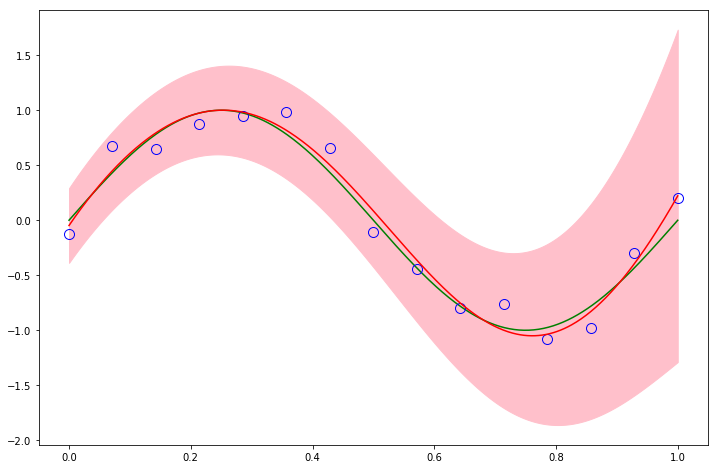

In [115]:
from numpy.linalg import inv

# train set size
N = 15
# 生成等距的 N 个点
x_tr = np.linspace(0,1,N)

# 计算 y
y_tr = np.sin(2 * np.pi * x_tr) + 0.25 * np.random.normal(0, 0.5, N)

M = 9
# 岭回归
log_lamb = -15
w_ridge = ridge_regression(x_tr, y_tr, np.exp(log_lamb), M)

# p(w) 的预值
mu_0 = np.array([0 for x in range(M+1)])
lamb_0 = inv(1 / np.exp(log_lamb) * np.identity(M + 1))

# X 是一个 N x (M+1) 维的
X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
lamb_m = X.T.dot(X) + lamb_0
mu_m = inv(lamb_m).dot(X.T.dot(y_tr) + lamb_0.dot(mu_0))

# plot
plt.figure(figsize=(12, 8))
xx = np.linspace(0, 1, 500)
plt.plot(xx, np.sin(2 * np.pi * xx), 'g')
plt.plot(x_tr, y_tr, 'o', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1)
plt.plot(xx, predict(w_ridge, xx), 'r')
# 完全重合
# plt.plot(xx, predict(mu_m, xx), 'b')
print('证明完全贝叶斯线性回归在 mu = 0, sigma = 1 / alpha * I 时跟对应的岭回归完全重合: ' + str(np.allclose(w_ridge, mu_m)))
# 95% 置信区间
############################################
## 不知道为啥, 我 95% 置信区间在右边那一块这么大
############################################
plt.fill_between(xx, predict(mu_m - 1.96 / np.sqrt(xx.size) * np.sqrt(np.diag(lamb_m)), xx), predict(mu_m + 1.96 / np.sqrt(xx.size) * np.sqrt(np.diag(lamb_m)), xx), color="pink")